In [1]:
import pandas as pd   #(Data Manipulation)
import numpy as np



In [2]:
import matplotlib.pyplot as plt   # Data visualization
import seaborn as sns

In [3]:
import warnings # ignore warnigs
warnings.filterwarnings('ignore')

In [4]:
users = pd.read_csv("Users.csv")
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [8]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [9]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,3462017942,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...
freq,1,27,632,13903,7535,2,2,2


In [10]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [11]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
books.isnull().sum()


ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [14]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [15]:
#Fill missing Age with Median
users['Age'].fillna(users['Age'].median(), inplace=True)

In [16]:
#Fix Age Outliers
users['Age'].describe()

count    278858.000000
mean         33.658568
std          11.282618
min           0.000000
25%          29.000000
50%          32.000000
75%          35.000000
max         244.000000
Name: Age, dtype: float64

In [17]:
users = users[(users['Age'] >= 5) & (users['Age'] <= 130)]

In [18]:
books['Book-Author']=books['Book-Author'].fillna("Unknown", inplace=True)

In [19]:
books['Publisher']=books['Publisher'].fillna("Unknown", inplace=True)

In [20]:
print("Users Duplicates:", users.duplicated().sum())

Users Duplicates: 0


In [21]:
print("Books Duplicates:", books.duplicated().sum())

Books Duplicates: 0


In [22]:
print("Ratings Duplicates:", ratings.duplicated().sum())

Ratings Duplicates: 0


In [23]:
users.columns = users.columns.str.lower().str.replace('-', '_')

In [24]:
books.columns = books.columns.str.lower().str.replace('-', '_')

In [25]:
ratings.columns = ratings.columns.str.lower().str.replace('-', '_')

In [26]:
books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [27]:
books['year_of_publication'] = pd.to_numeric(books['year_of_publication'], errors='coerce')


In [28]:
books['year_of_publication'].isnull().sum()


np.int64(3)

In [29]:
books.year_of_publication.unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,    0., 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 2030., 1911., 1904., 1949., 1932.,
       1928., 1929., 1927., 1931., 1914., 2050., 1934., 1910., 1933.,
       1902., 1924., 1921., 1900., 2038., 2026., 1944., 1917., 1901.,
       2010., 1908., 1906., 1935., 1806., 2021., 2012., 2006.,   nan,
       1909., 2008., 1378., 1919., 1922., 1897., 2024., 1376., 2037.])

In [30]:
books['year_of_publication'].min()

0.0

In [31]:
books['year_of_publication'].max()

2050.0

In [32]:
invalid_years = books[(books['year_of_publication'] < 1900) |(books['year_of_publication'] > 2026)]

invalid_years.shape

(4633, 8)

In [33]:
books = books[(books['year_of_publication'] >= 1900) &(books['year_of_publication'] <= 2026)]


In [34]:
books.shape
books['year_of_publication'].min()

1900.0

In [35]:
books['year_of_publication'].max()

2026.0

In [36]:
ratings = ratings[ratings['isbn'].isin(books['isbn'])]
ratings.shape

(1017071, 3)

In [37]:
ratings_explicit = ratings[ratings['book_rating'] != 0]
ratings_explicit.shape


(378034, 3)

In [38]:
ratings_explicit['book_rating'].describe()

count    378034.000000
mean          7.627303
std           1.841679
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: book_rating, dtype: float64

In [39]:
ratings_explicit.groupby('user_id')['book_rating'].count().describe()


count    67073.000000
mean         5.636158
std         41.518567
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6782.000000
Name: book_rating, dtype: float64

In [40]:
ratings_explicit.groupby('isbn')['book_rating'].count().describe()


count    147104.000000
mean          2.569842
std           7.559297
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         707.000000
Name: book_rating, dtype: float64

In [41]:
#Filter Users With ≥ 3 Ratings
user_counts = ratings_explicit.groupby('user_id')['book_rating'].count()

active_users = user_counts[user_counts >= 3].index

ratings_filtered = ratings_explicit[
    ratings_explicit['user_id'].isin(active_users)
]

ratings_filtered.shape


(322321, 3)

In [42]:
# Filter Books With ≥ 3 Ratings
book_counts = ratings_filtered.groupby('isbn')['book_rating'].count()

popular_books = book_counts[book_counts >= 3].index

ratings_filtered = ratings_filtered[
    ratings_filtered['isbn'].isin(popular_books)
]

ratings_filtered.shape

(191382, 3)

In [43]:

ratings_filtered['user_id'].nunique()



19002

In [44]:
ratings_filtered['isbn'].nunique()

23574

In [45]:
ratings_filtered['user_id'].nunique() + ratings_filtered['isbn'].nunique()

42576

In [46]:
# visualization

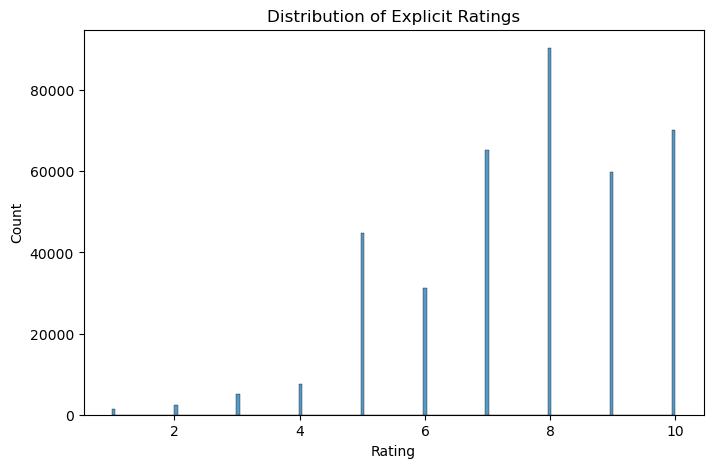

In [47]:
#Rating Distribution Analysis
plt.figure(figsize=(8,5))
sns.histplot(x='book_rating', data=ratings_explicit)
plt.title("Distribution of Explicit Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [48]:
top_books = ratings_filtered.groupby('isbn')['book_rating'].count().sort_values(ascending=False).head(10)

top_books


isbn
0316666343    486
0385504209    380
0971880107    315
0312195516    267
059035342X    256
0060928336    247
0142001740    237
0671027360    225
0446672211    220
0452282152    207
Name: book_rating, dtype: int64

In [49]:
top_books_titles = ratings_filtered.merge(books, on='isbn')

top_10 = top_books_titles.groupby('book_title')['book_rating'].count().sort_values(ascending=False).head(10)

top_10


book_title
The Lovely Bones: A Novel                           486
The Da Vinci Code                                   386
Wild Animus                                         315
The Secret Life of Bees                             303
The Nanny Diaries: A Novel                          297
Bridget Jones's Diary                               295
Harry Potter and the Chamber of Secrets (Book 2)    292
Life of Pi                                          270
The Red Tent (Bestselling Backlist)                 267
A Painted House                                     262
Name: book_rating, dtype: int64

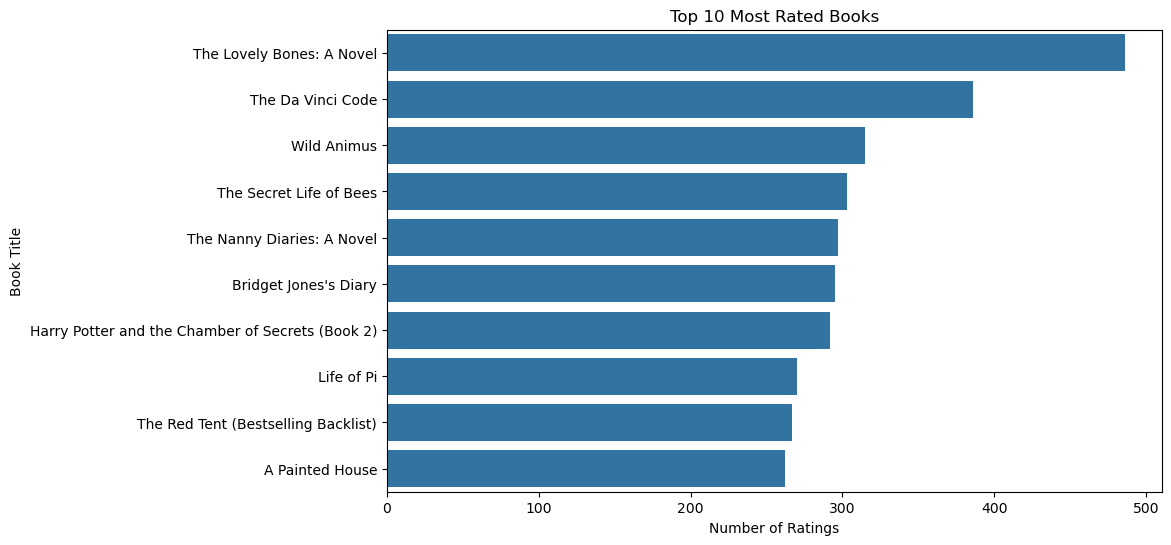

In [50]:
#Top 10 Most Rated Books

# Merge to get book titles

ratings_with_titles = ratings_filtered.merge(books, on='isbn')

# Count ratings per book title
top_books = ratings_with_titles.groupby('book_title')['book_rating'].count() \
                                .sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_books.values, y=top_books.index)
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.show()


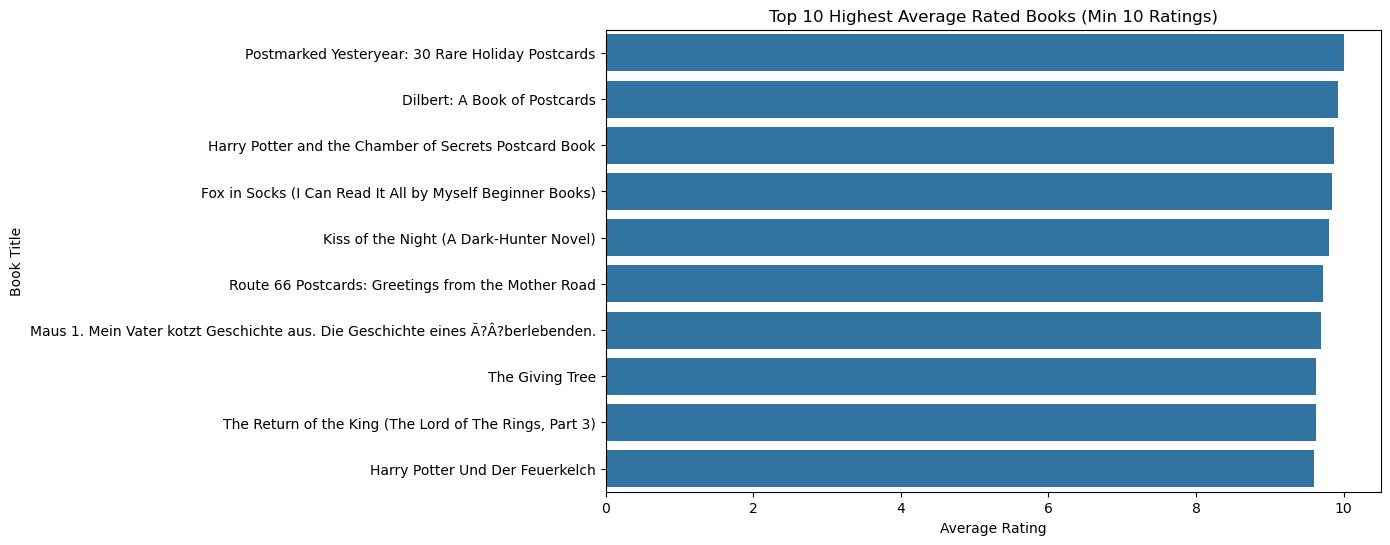

In [51]:
book_stats = ratings_with_titles.groupby('book_title')['book_rating'] \
                                 .agg(['count','mean']) \
                                 .reset_index()

# Filter books with at least 10 ratings
popular_books = book_stats[book_stats['count'] >= 10]

top_rated = popular_books.sort_values('mean', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_rated['mean'], y=top_rated['book_title'])
plt.title("Top 10 Highest Average Rated Books (Min 10 Ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
plt.show()


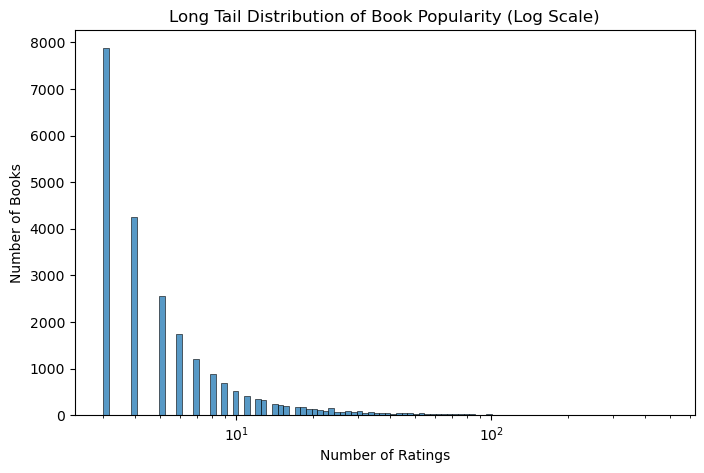

In [52]:
book_popularity = ratings_filtered.groupby('isbn')['book_rating'].count()

plt.figure(figsize=(8,5))
sns.histplot(book_popularity, bins=100, log_scale=True)
plt.title("Long Tail Distribution of Book Popularity (Log Scale)")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Books")
plt.show()


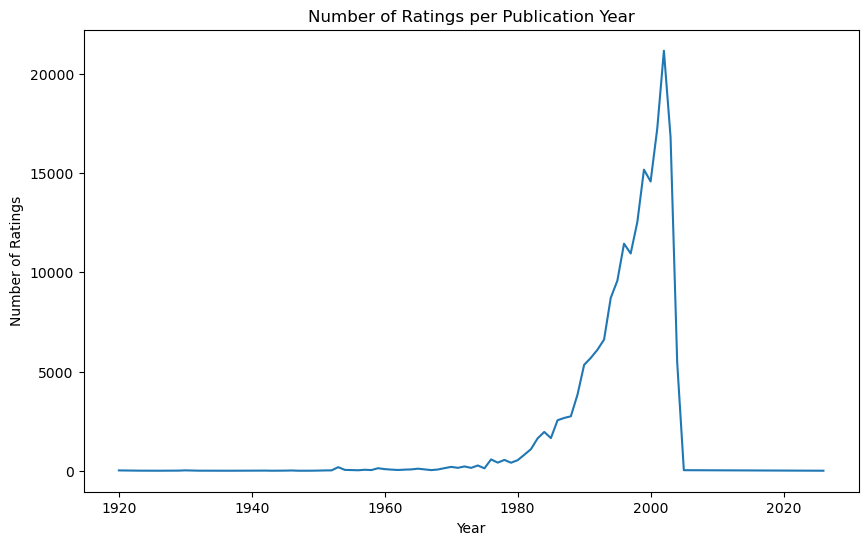

In [53]:
ratings_with_titles = ratings_filtered.merge(books, on='isbn')

year_trend = ratings_with_titles.groupby('year_of_publication')['book_rating'].count()

plt.figure(figsize=(10,6))
year_trend.plot()
plt.title("Number of Ratings per Publication Year")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.show()


In [55]:
#feature Engineering
#Feature 1: Number of Ratings per Book
book_features = ratings_filtered.groupby('isbn')['book_rating'] \
                                 .agg(['count','mean','std']) \
                                 .reset_index()

book_features.rename(columns={
    'count': 'rating_count',
    'mean': 'average_rating',
    'std': 'rating_std'
}, inplace=True)

book_features.head()


,isbn,rating_count,average_rating,rating_std
0,0002005018,7,7.428571,1.511858
1,0002116286,3,7.000000,1.000000
2,0002240114,3,7.000000,2.000000
3,0002244098,3,6.333333,1.154701
4,0002251760,6,9.000000,2.000000


<Axes: xlabel='rating_count', ylabel='average_rating'>

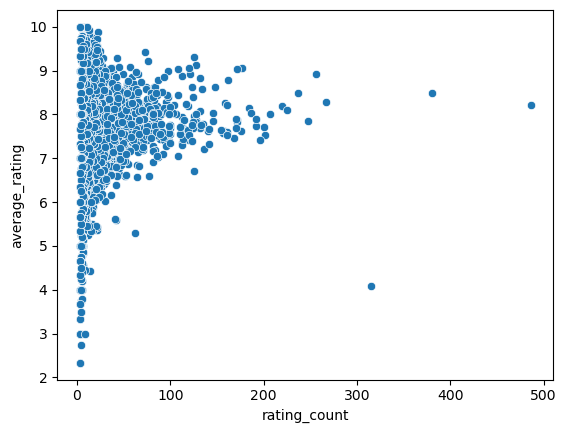

In [56]:
#Correlation Analysis
sns.scatterplot(x='rating_count', y='average_rating', data=book_features)


In [57]:
#Feature 2: Rating Variance (Stability Measure)
#Weighted Rating Score (IMDb-style weighted rating)
C = ratings_filtered['book_rating'].mean()
C


np.float64(7.729702897869183)

In [58]:
m = 10
book_features['weighted_rating'] = (
    (book_features['rating_count'] / (book_features['rating_count'] + m)) * book_features['average_rating']
    +
    (m / (book_features['rating_count'] + m)) * C
)


In [59]:
#User-Level Feature Engineering
user_features = ratings_filtered.groupby('user_id')['book_rating'] \
                                 .agg(['count','mean','std'])


In [60]:
ratings_enriched = ratings_filtered.merge(book_features, on='isbn')


In [61]:
print("Final Users:", ratings_filtered['user_id'].nunique())
print("Final Books:", ratings_filtered['isbn'].nunique())
print("Final Ratings:", ratings_filtered.shape[0])


Final Users: 19002
Final Books: 23574
Final Ratings: 191382


In [62]:
# Machine Learning model building And Evaluation(Popularity Based)

In [63]:
# Merge book titles
book_popularity = book_features.merge(books, on='isbn')

# Sort by weighted rating
top_books = book_popularity.sort_values('weighted_rating', ascending=False)

# Show Top 10
top_books[['book_title', 'weighted_rating', 'rating_count']].head(10)

,book_title,weighted_rating,rating_count
9053,Harry Potter and the Chamber of Secrets Postca...,9.221122,23
4211,"The Return of the King (The Lord of the Rings,...",9.220446,73
9016,Harry Potter and the Goblet of Fire (Book 4),9.187385,125
14725,"The Two Towers (The Lord of the Rings, Part 2)",9.074098,21
4210,"The Two Towers (The Lord of the Rings, Part 2)",9.049965,76
425,The Giving Tree,9.044725,19
9013,Harry Potter and the Prisoner of Azkaban (Book 3),9.023892,128
9044,Harry Potter and the Order of the Phoenix (Boo...,8.990893,177
9045,Harry Potter and the Sorcerer's Stone (Book 1),8.986736,43
427,Where the Sidewalk Ends : Poems and Drawings,8.978032,22


In [64]:
def recommend_popular_books(n=10):
    return top_books[['book_title', 'weighted_rating', 'rating_count']].head(n)

In [65]:
recommend_popular_books(10)

,book_title,weighted_rating,rating_count
9053,Harry Potter and the Chamber of Secrets Postca...,9.221122,23
4211,"The Return of the King (The Lord of the Rings,...",9.220446,73
9016,Harry Potter and the Goblet of Fire (Book 4),9.187385,125
14725,"The Two Towers (The Lord of the Rings, Part 2)",9.074098,21
4210,"The Two Towers (The Lord of the Rings, Part 2)",9.049965,76
425,The Giving Tree,9.044725,19
9013,Harry Potter and the Prisoner of Azkaban (Book 3),9.023892,128
9044,Harry Potter and the Order of the Phoenix (Boo...,8.990893,177
9045,Harry Potter and the Sorcerer's Stone (Book 1),8.986736,43
427,Where the Sidewalk Ends : Poems and Drawings,8.978032,22


In [66]:
#Collaborative Based

In [67]:
user_item_matrix = ratings_filtered.pivot_table(
    index='user_id',
    columns='isbn',
    values='book_rating'
)

In [68]:
user_item_matrix_filled = user_item_matrix.fillna(0)

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose matrix for item-based similarity
item_similarity = cosine_similarity(user_item_matrix_filled.T)

In [70]:
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=user_item_matrix_filled.columns,
    columns=user_item_matrix_filled.columns
)

In [71]:
def recommend_similar_books(book_isbn, n=10):
    similar_scores = item_similarity_df[book_isbn].sort_values(ascending=False)
    return similar_scores.iloc[1:n+1]

In [72]:
#Testing the Collaborative Based model

In [73]:
user_item_matrix_filled.columns[:10]

Index(['0002005018', '0002116286', '0002240114', '0002244098', '0002251760',
       '0002255081', '0002550563', '0003300277', '000458726X', '0004701674'],
      dtype='object', name='isbn')

In [74]:
recommend_similar_books('0003300277', 5)

isbn
207036805X    0.387953
0679642579    0.354567
9505118678    0.331911
0140154078    0.321210
044018424X    0.320421
Name: 0003300277, dtype: float64

In [75]:
#Convert ISBN to Book Titles

In [76]:
def recommend_similar_books(book_isbn, n=5):
    similar_scores = item_similarity_df[book_isbn].sort_values(ascending=False)
    top_isbns = similar_scores.iloc[1:n+1].index
    
    recommended_books = books[books['isbn'].isin(top_isbns)]
    
    return recommended_books[['book_title', 'book_author']]

In [77]:
recommend_similar_books('0003300277', 5)

,book_title,book_author
13097,La Nausee,None
24098,The Music of Chance,None
28335,The Hunchback of Notre-Dame (Modern Library Cl...,None
93627,Opus Nigrum,None
115413,Swag,None


In [78]:
# MODEL EVALUATION 

In [79]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(
    ratings_filtered,
    test_size=0.2,
    random_state=42
)

In [80]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

train_data['user_idx'] = user_encoder.fit_transform(train_data['user_id'])
train_data['book_idx'] = book_encoder.fit_transform(train_data['isbn'])

In [81]:
from scipy.sparse import coo_matrix

sparse_matrix = coo_matrix(
    (train_data['book_rating'],
     (train_data['user_idx'], train_data['book_idx']))
)

sparse_matrix = sparse_matrix.tocsr()

In [82]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(sparse_matrix.T)

NearestNeighbors(algorithm='brute', metric='cosine')

In [83]:
def recommend_knn(book_idx, n=5):
    
    distances, indices = model_knn.kneighbors(
        sparse_matrix.T[book_idx],
        n_neighbors=n+1
    )
    
    return indices.flatten()[1:]

In [84]:
def precision_at_k(user_id, k=5):
    
    if user_id not in train_data['user_id'].values:
        return None
    
    # Get encoded user index
    user_idx = user_encoder.transform([user_id])[0]
    
    # Books user rated in test set
    test_books = test_data[test_data['user_id'] == user_id]['isbn']
    
    if len(test_books) == 0:
        return None
    
    # Books user rated in train set
    train_books = train_data[train_data['user_id'] == user_id]
    
    recommended = []
    
    for _, row in train_books.iterrows():
        book_idx = row['book_idx']
        similar_books = recommend_knn(book_idx, n=k)
        recommended.extend(similar_books)
    
    recommended = list(set(recommended))
    
    # Convert book_idx back to ISBN
    recommended_isbn = book_encoder.inverse_transform(recommended)
    
    relevant = len(set(recommended_isbn) & set(test_books))
    
    return relevant / k

In [85]:
users_sample = train_data['user_id'].unique()[:100]

precisions = []

for user in users_sample:
    p = precision_at_k(user, k=5)
    if p is not None:
        precisions.append(p)

print("Average Precision@5:", sum(precisions)/len(precisions))

Average Precision@5: 0.5444444444444444


In [86]:
#2nd Aproach 

In [87]:
top_popular_books = book_features.sort_values(
    'weighted_rating',
    ascending=False
)['isbn'].values

In [88]:
def popularity_precision_at_k(user_id, k=5):
    
    # Books user liked in test set
    test_books = test_data[test_data['user_id'] == user_id]['isbn']
    
    if len(test_books) == 0:
        return None
    
    # Top K popular books
    recommended = top_popular_books[:k]
    
    relevant = len(set(recommended) & set(test_books))
    
    return relevant / k

In [89]:
users_sample = train_data['user_id'].unique()[:100]

pop_precisions = []

for user in users_sample:
    p = popularity_precision_at_k(user, k=5)
    if p is not None:
        pop_precisions.append(p)

print("Popularity Precision@5:", sum(pop_precisions)/len(pop_precisions))

Popularity Precision@5: 0.006666666666666668


In [90]:
#hybrid model

In [91]:
# Normalize weighted rating between 0 and 1
book_features['popularity_norm'] = (
    book_features['weighted_rating'] - book_features['weighted_rating'].min()
) / (
    book_features['weighted_rating'].max() - book_features['weighted_rating'].min()
)

In [92]:
def recommend_hybrid(book_idx, n=5, alpha=0.7):
    
    distances, indices = model_knn.kneighbors(
        sparse_matrix.T[book_idx],
        n_neighbors=n+1
    )
    
    similar_indices = indices.flatten()[1:]
    similarity_scores = 1 - distances.flatten()[1:]
    
    hybrid_scores = []
    
    for idx, sim_score in zip(similar_indices, similarity_scores):
        
        isbn = book_encoder.inverse_transform([idx])[0]
        
        pop_score = book_features.loc[
            book_features['isbn'] == isbn,
            'popularity_norm'
        ].values
        
        if len(pop_score) == 0:
            pop_score = 0
        else:
            pop_score = pop_score[0]
        
        final_score = alpha * sim_score + (1 - alpha) * pop_score
        
        hybrid_scores.append((idx, final_score))
    
    hybrid_scores = sorted(hybrid_scores, key=lambda x: x[1], reverse=True)
    
    return [idx for idx, score in hybrid_scores]

In [93]:
def hybrid_precision_at_k(user_id, k=5, alpha=0.7):
    
    if user_id not in train_data['user_id'].values:
        return None
    
    user_idx = user_encoder.transform([user_id])[0]
    
    test_books = test_data[test_data['user_id'] == user_id]['isbn']
    
    if len(test_books) == 0:
        return None
    
    train_books = train_data[train_data['user_id'] == user_id]
    
    recommended = []
    
    for _, row in train_books.iterrows():
        book_idx = row['book_idx']
        recs = recommend_hybrid(book_idx, n=k, alpha=alpha)
        recommended.extend(recs)
    
    recommended = list(set(recommended))
    
    recommended_isbn = book_encoder.inverse_transform(recommended)
    
    relevant = len(set(recommended_isbn) & set(test_books))
    
    return relevant / k

In [94]:
hybrid_precisions = []

for user in users_sample:
    p = hybrid_precision_at_k(user, k=5, alpha=0.7)
    if p is not None:
        hybrid_precisions.append(p)

print("Hybrid Precision@5:", sum(hybrid_precisions)/len(hybrid_precisions))

Hybrid Precision@5: 0.5444444444444444


In [97]:
#deep learning

In [98]:
from sklearn.preprocessing import LabelEncoder

user_encoder_dl = LabelEncoder()
book_encoder_dl = LabelEncoder()

ratings_filtered['user_idx'] = user_encoder_dl.fit_transform(ratings_filtered['user_id'])
ratings_filtered['book_idx'] = book_encoder_dl.fit_transform(ratings_filtered['isbn'])

In [99]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    ratings_filtered,
    test_size=0.2,
    random_state=42
)

In [100]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

In [102]:
num_users = ratings_filtered['user_idx'].nunique()
num_books = ratings_filtered['book_idx'].nunique()

embedding_size = 50

In [103]:
user_input = Input(shape=(1,))
book_input = Input(shape=(1,))

In [104]:
user_embedding = Embedding(num_users, embedding_size)(user_input)
book_embedding = Embedding(num_books, embedding_size)(book_input)

In [105]:
user_vec = Flatten()(user_embedding)
book_vec = Flatten()(book_embedding)

In [106]:
concat = Concatenate()([user_vec, book_vec])

In [114]:
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='sigmoid')(dense2)

In [115]:
model = Model([user_input, book_input], output)

model.compile(
    optimizer='adam',
    loss='mse'
)

In [116]:
train_df['book_rating'] = train_df['book_rating'] / 10.0
test_df['book_rating'] = test_df['book_rating'] / 10.0

In [117]:
model.fit(
    [train_df['user_idx'], train_df['book_idx']],
    train_df['book_rating'],
    epochs=15,
    batch_size=256,
    validation_split=0.1
)

Epoch 1/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - loss: 0.0199 - val_loss: 0.0292
Epoch 2/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 0.0115 - val_loss: 0.0303
Epoch 3/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.0081 - val_loss: 0.0314
Epoch 4/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 0.0061 - val_loss: 0.0329
Epoch 5/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 0.0048 - val_loss: 0.0330
Epoch 6/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 0.0039 - val_loss: 0.0339
Epoch 7/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.0033 - val_loss: 0.0337
Epoch 8/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0028 - val_loss: 0.0336
Epoch 9/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.0024 - val_loss: 0.0338
Epoch 10/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - loss: 0.0021 - val_loss: 0.0337
Epoch 11/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.0018 - val_loss: 0.0340
Epoch 12/15
539/539 ━━━━━━━━━━

In [118]:
import numpy as np

def dl_precision_at_k(user_id, k=5):
    
    if user_id not in user_encoder_dl.classes_:
        return None
    
    user_idx = user_encoder_dl.transform([user_id])[0]
    
    test_books = test_df[test_df['user_id'] == user_id]['isbn']
    if len(test_books) == 0:
        return None
    
    # Books user already rated in training
    train_books = train_df[train_df['user_id'] == user_id]['isbn']
    
    # Predict ratings for all books
    book_indices = np.arange(num_books)
    user_array = np.full(num_books, user_idx)
    
    preds = model.predict([user_array, book_indices], verbose=0).flatten()
    
    # Convert indices to ISBN
    all_isbn = book_encoder_dl.inverse_transform(book_indices)
    
    # Create dataframe for filtering
    pred_df = pd.DataFrame({
        'isbn': all_isbn,
        'pred_rating': preds
    })
    
    # Remove already seen books
    pred_df = pred_df[~pred_df['isbn'].isin(train_books)]
    
    # Select top K
    top_k_books = pred_df.sort_values('pred_rating', ascending=False).head(k)['isbn']
    
    relevant = len(set(top_k_books) & set(test_books))
    
    return relevant / k

In [119]:
# Evaluate Deep Learning Model

users_sample = train_df['user_id'].unique()[:100]

dl_precisions = []

for user in users_sample:
    p = dl_precision_at_k(user, k=5)
    if p is not None:
        dl_precisions.append(p)

print("Deep Learning Precision@5:", sum(dl_precisions)/len(dl_precisions))

Deep Learning Precision@5: 0.0022222222222222222


In [95]:
# Deployment 

In [120]:
import pickle

pickle.dump(model_knn, open("model_knn.pkl", "wb"))
pickle.dump(book_encoder, open("book_encoder.pkl", "wb"))
pickle.dump(sparse_matrix, open("sparse_matrix.pkl", "wb"))

books.to_csv("Books_clean.csv", index=False)